**UNIVERSIDADE FEDERAL DE SÃO CARLOS**

*Curso de Especialização em Ciência de Dados*

**Disciplina de Processamento Digital de Imagens**

Prof. Dr. Ricardo José Ferrari

---


**Integrantes do grupo:**

Jesus Arbey Benavides Guevara

Rodrigo Riul

Sylvia Iasulaitis

### Bibliotecas

In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import scipy.ndimage as ndi
import seaborn as sns
import copy
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage import io
import cv2
from google.colab.patches import cv2_imshow as imshow
from scipy import ndimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path  = "/content/drive/MyDrive/PDI_Sylvia_Rodrigo_Jesus/"

# Gerando dataset de imagens

In [ ]:
img = []
img_path = {"image_path":[]}

for image in glob.glob(path+"/"+"*.jpg"):
    x = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img.append(x)
    img_path["image_path"].append(image)

img_path = pd.DataFrame(img_path)

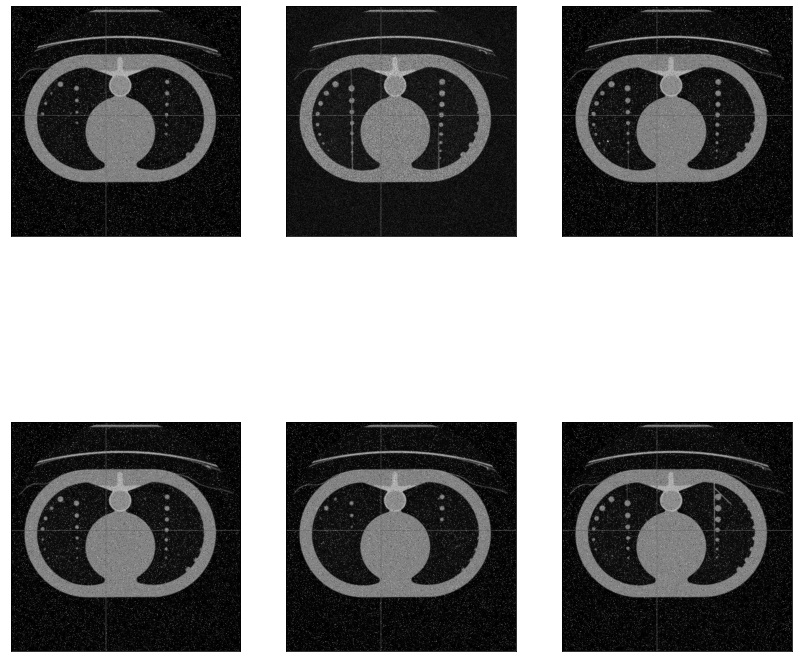

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(img)):
    plt.subplot(2,3,i+1)
    plt.imshow(img[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

# Filtragem

##Filtragem mediana

Simulando o filtro de mediana para kernels 3, 5, 7, 9

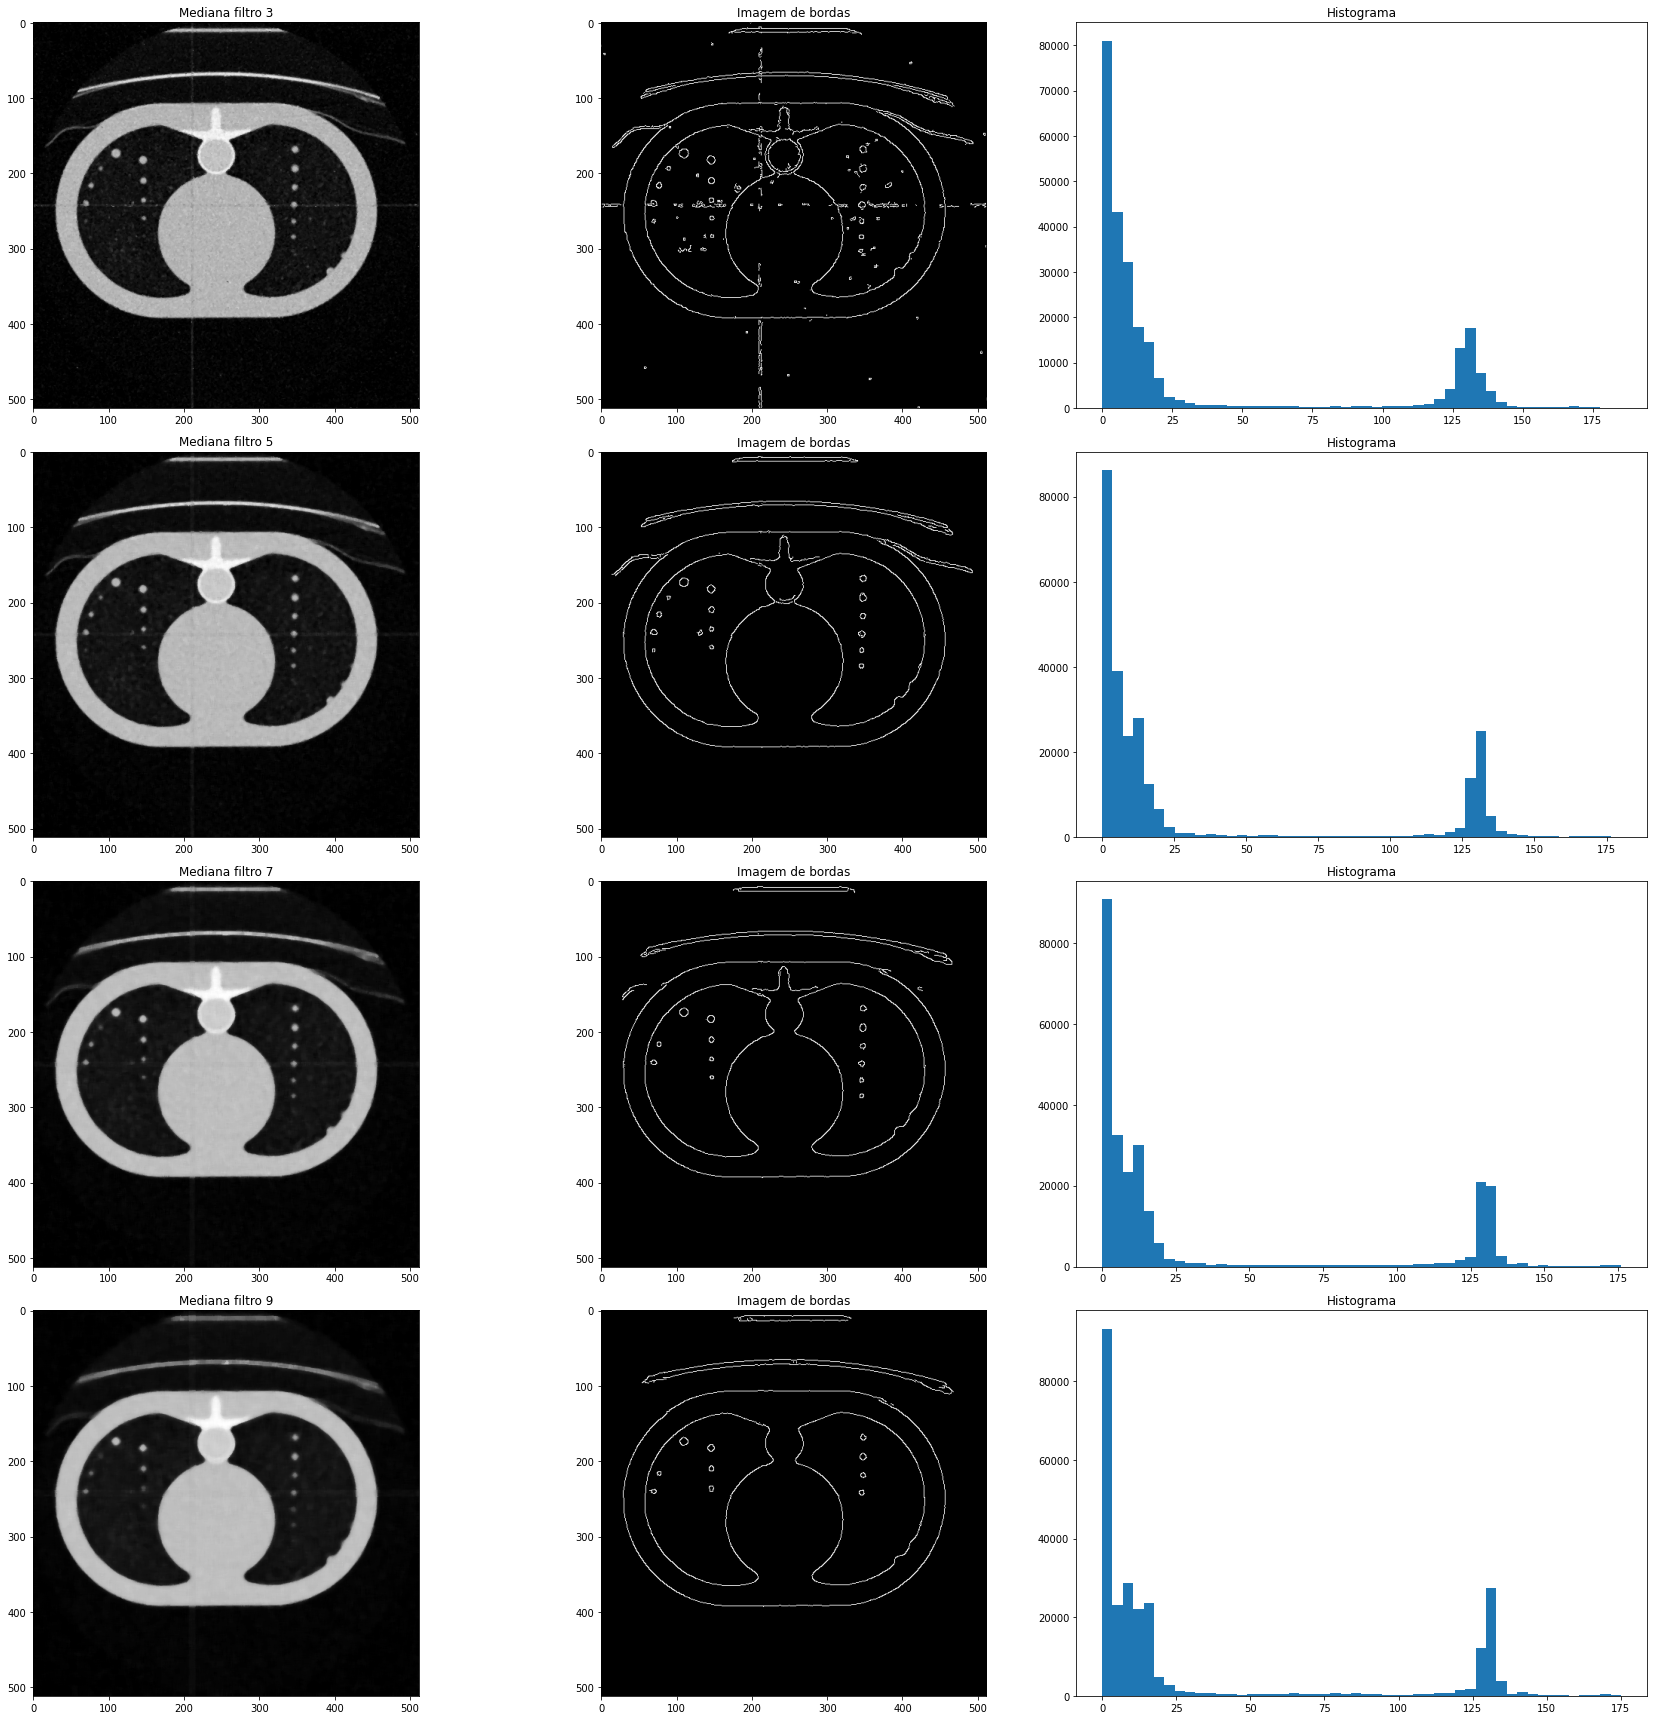

In [ ]:
# Buscando o kernel ótimo para filtragem mediana para a imagem img[0]

plt.figure(figsize=[24, 24])

img_median = cv2.medianBlur(img[0], 3)
plt.subplot(4, 3, 1)
plt.imshow(img_median, cmap='gray')
plt.title('Mediana filtro 3')

img_edges = cv2.Canny(img_median, 50, 120)
plt.subplot(4, 3, 2)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 3)
_=plt.hist(img_median.flatten(), 50)
plt.title('Histograma')

img_median = cv2.medianBlur(img[0], 5)
plt.subplot(4, 3, 4)
plt.imshow(img_median, cmap='gray')
plt.title('Mediana filtro 5')

img_edges = cv2.Canny(img_median, 50, 120)
plt.subplot(4, 3, 5)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 6)
_=plt.hist(img_median.flatten(), 50)
plt.title('Histograma')

img_median = cv2.medianBlur(img[0], 7)
plt.subplot(4, 3, 7)
plt.imshow(img_median, cmap='gray')
plt.title('Mediana filtro 7')

img_edges = cv2.Canny(img_median, 50, 120)
plt.subplot(4, 3, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 9)
_=plt.hist(img_median.flatten(), 50)
plt.title('Histograma')

img_median = cv2.medianBlur(img[0], 9)
plt.subplot(4, 3, 10)
plt.imshow(img_median, cmap='gray')
plt.title('Mediana filtro 9')

img_edges = cv2.Canny(img_median, 50, 120)
plt.subplot(4, 3, 11)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 12)
_=plt.hist(img_median.flatten(), 50)
plt.title('Histograma')

plt.tight_layout()

Com kernel = 3 ainda sobra muito ruído. Com kernel = 7 desaparecem alguns elementos circulares. Dessa forma o valor ideal é kernel = 5.

In [ ]:
#filtragem mediana

img_median = []

for i in range(len(img)):
  image = cv2.medianBlur(img[i], 5)
  img_median.append(image)

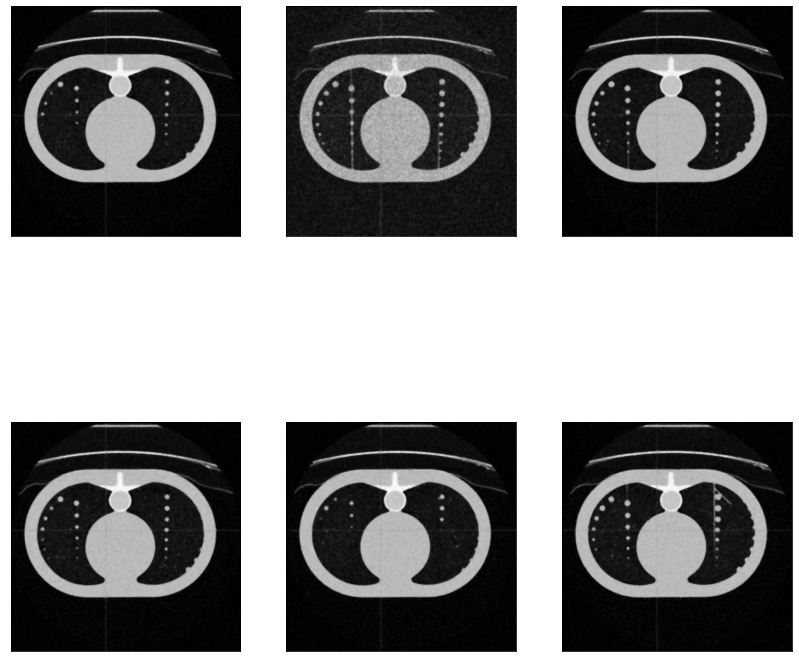

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(img_median)):
    plt.subplot(2,3,i+1)
    plt.imshow(img_median[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

##Filtragem gaussiana

Após a filtragem mediana ainda parece haver bastante ruído na imagem. Uma possibilidade é aplicar a filtragem gaussiana após a filtragem mediana.

Simulando o filtro de gaussiana para sigma 1.1, 1.3, 1.5, 1.7

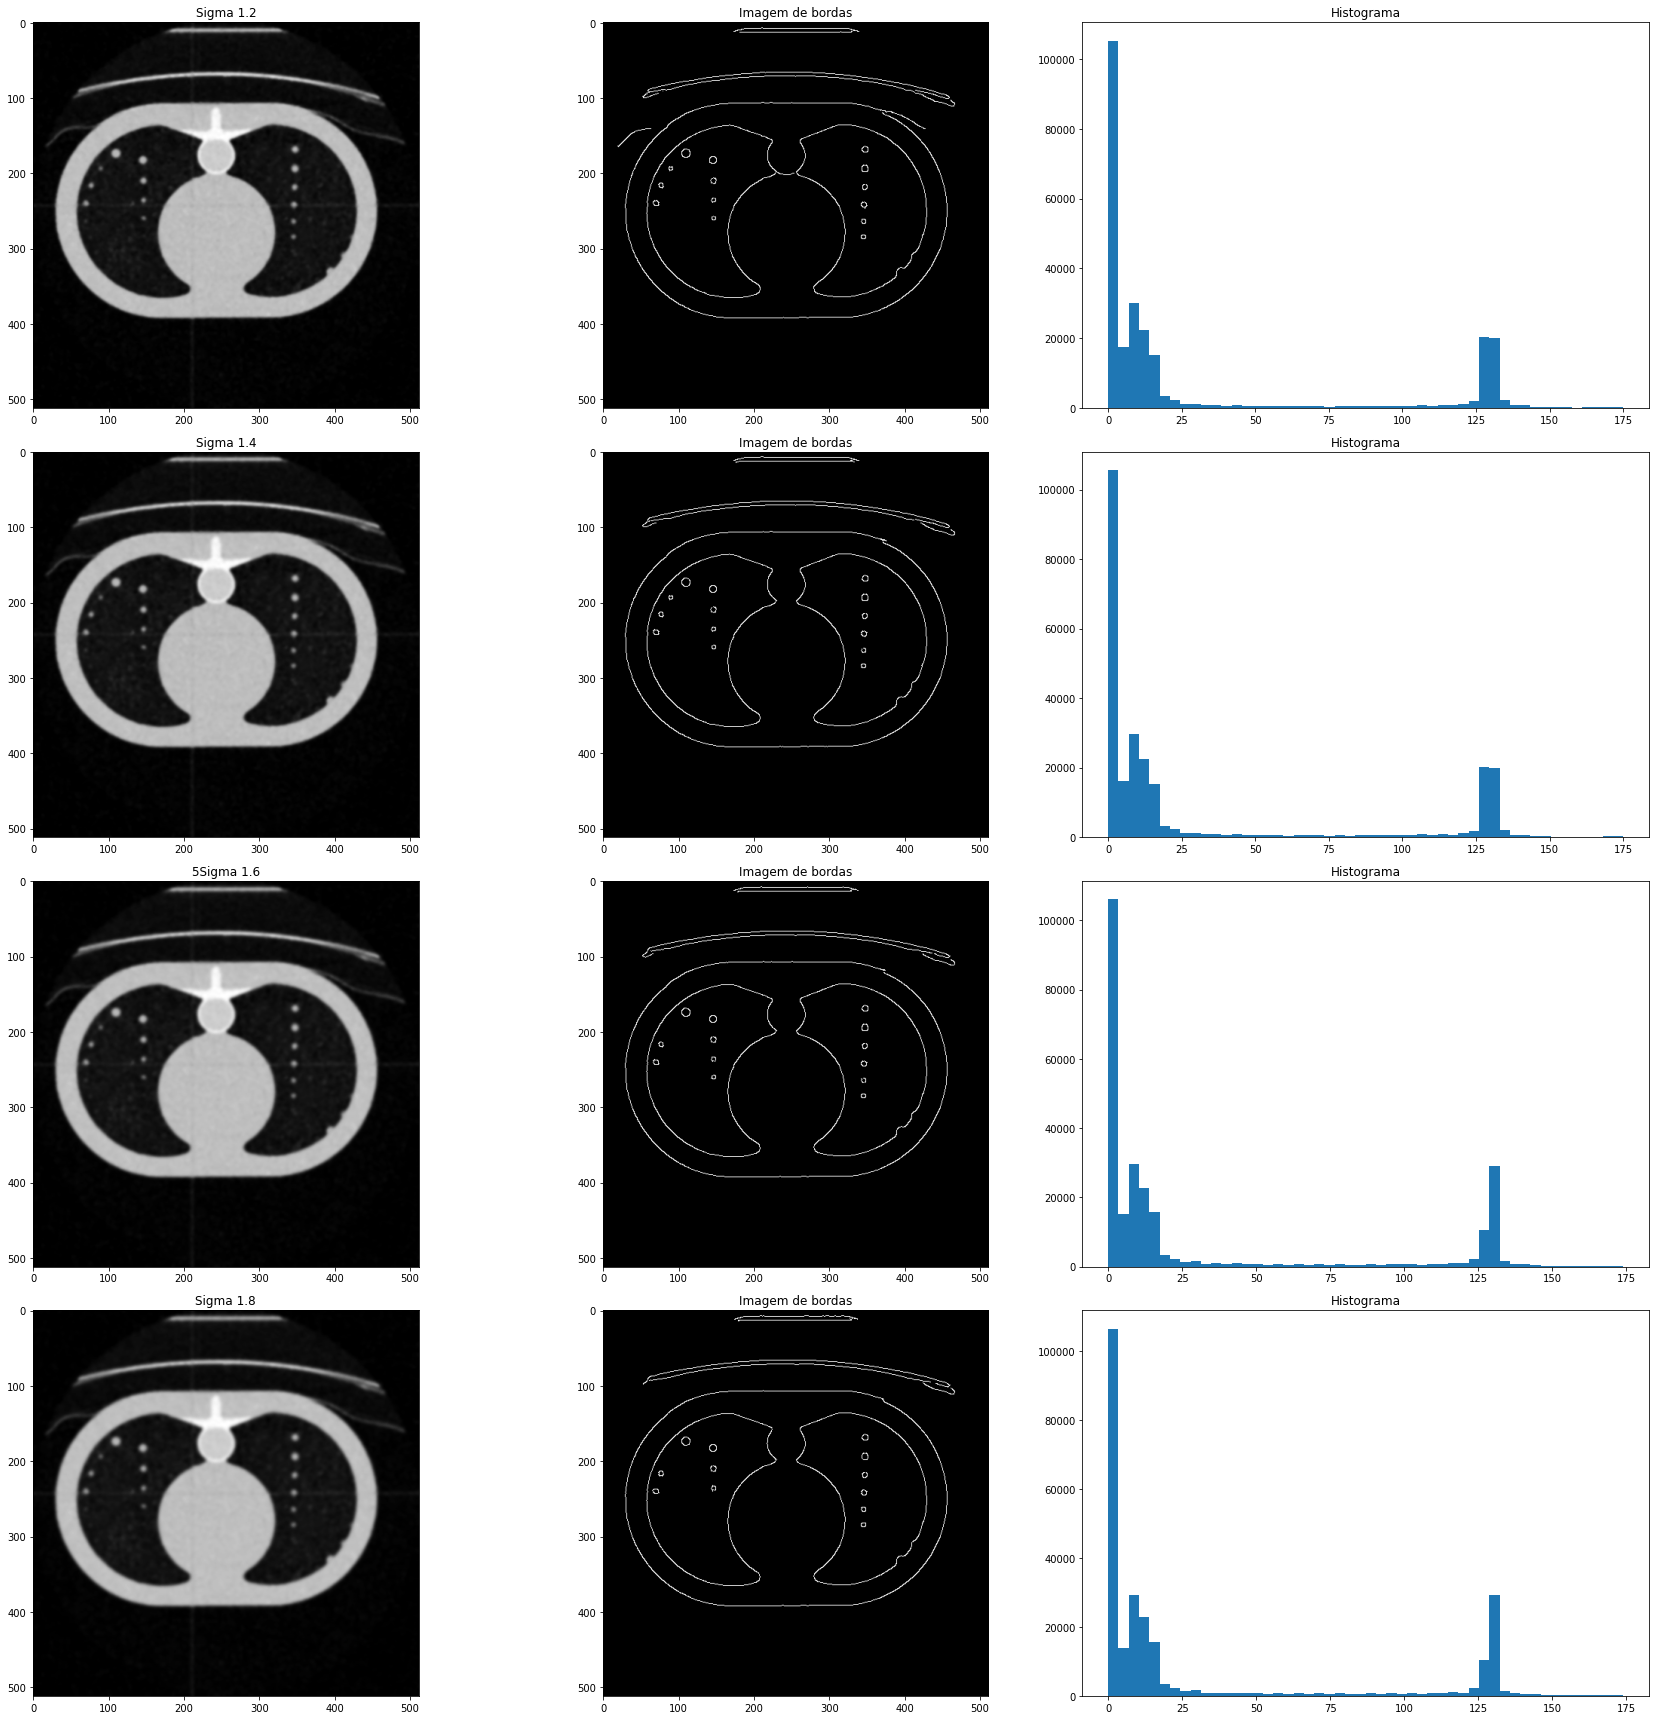

In [ ]:
# Buscando o sigma ótimo para filtragem gaussiana para a imagem img[0]

plt.figure(figsize=[24, 24])

img_gauss = ndi.gaussian_filter(img_median[0], sigma=1.2)
plt.subplot(4, 3, 1)
plt.imshow(img_gauss, cmap='gray')
plt.title('Sigma 1.2')

img_edges = cv2.Canny(img_gauss, 50, 120)
plt.subplot(4, 3, 2)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 3)
_=plt.hist(img_gauss.flatten(), 50)
plt.title('Histograma')

img_gauss = ndi.gaussian_filter(img_median[0], sigma=1.4)
plt.subplot(4, 3, 4)
plt.imshow(img_gauss, cmap='gray')
plt.title('Sigma 1.4')

img_edges = cv2.Canny(img_gauss, 50, 120)
plt.subplot(4, 3, 5)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 6)
_=plt.hist(img_gauss.flatten(), 50)
plt.title('Histograma')

img_gauss = ndi.gaussian_filter(img_median[0], sigma=1.6)
plt.subplot(4, 3, 7)
plt.imshow(img_gauss, cmap='gray')
plt.title('5Sigma 1.6')

img_edges = cv2.Canny(img_gauss, 50, 120)
plt.subplot(4, 3, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 9)
_=plt.hist(img_gauss.flatten(), 50)
plt.title('Histograma')

img_gauss = ndi.gaussian_filter(img_median[0], sigma=1.8)
plt.subplot(4, 3, 10)
plt.imshow(img_gauss, cmap='gray')
plt.title('Sigma 1.8')

img_edges = cv2.Canny(img_gauss, 50, 120)
plt.subplot(4, 3, 11)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 12)
_=plt.hist(img_gauss.flatten(), 50)
plt.title('Histograma')

plt.tight_layout()

Com sigma 1.6 alguns nódulos desaparecem da imagem de bordas. Como um sigma baixo, de 1.2, já deixa a imagem bastante limpa e outros tratamentos serão adotados adiante, a filtragem gaussinana será feita com esse parâmetro.

In [ ]:
#filtragem gaussiana

img_gauss = []

for i in range(len(img_median)):
  image = ndi.gaussian_filter(img_median[i], sigma=1.2)
  img_gauss.append(image)

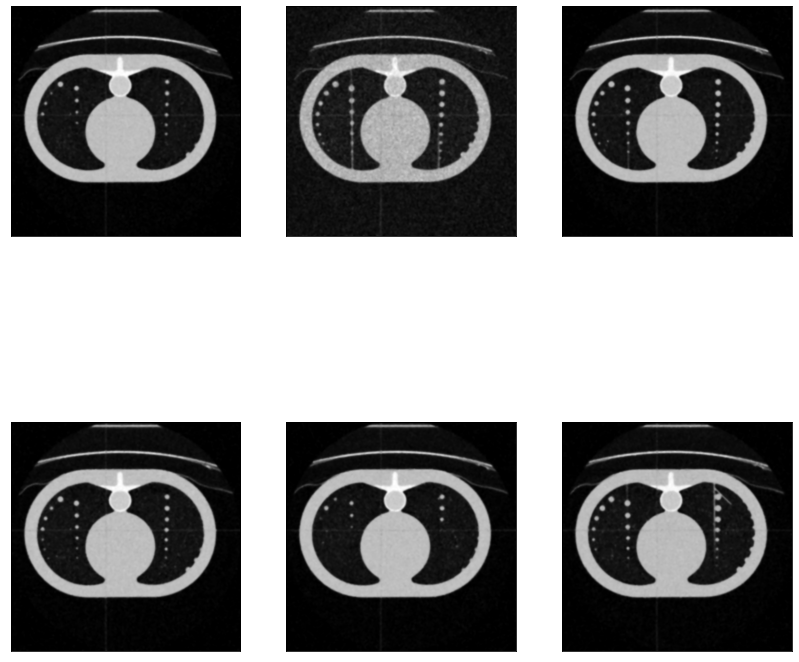

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(img_gauss)):
    plt.subplot(2,3,i+1)
    plt.imshow(img_gauss[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

##Filtragem bilateral

Uma outra possibilidade é aplicar a filtragem bilateral após a filtragem mediana, ao invés da filtragem gaussiana.

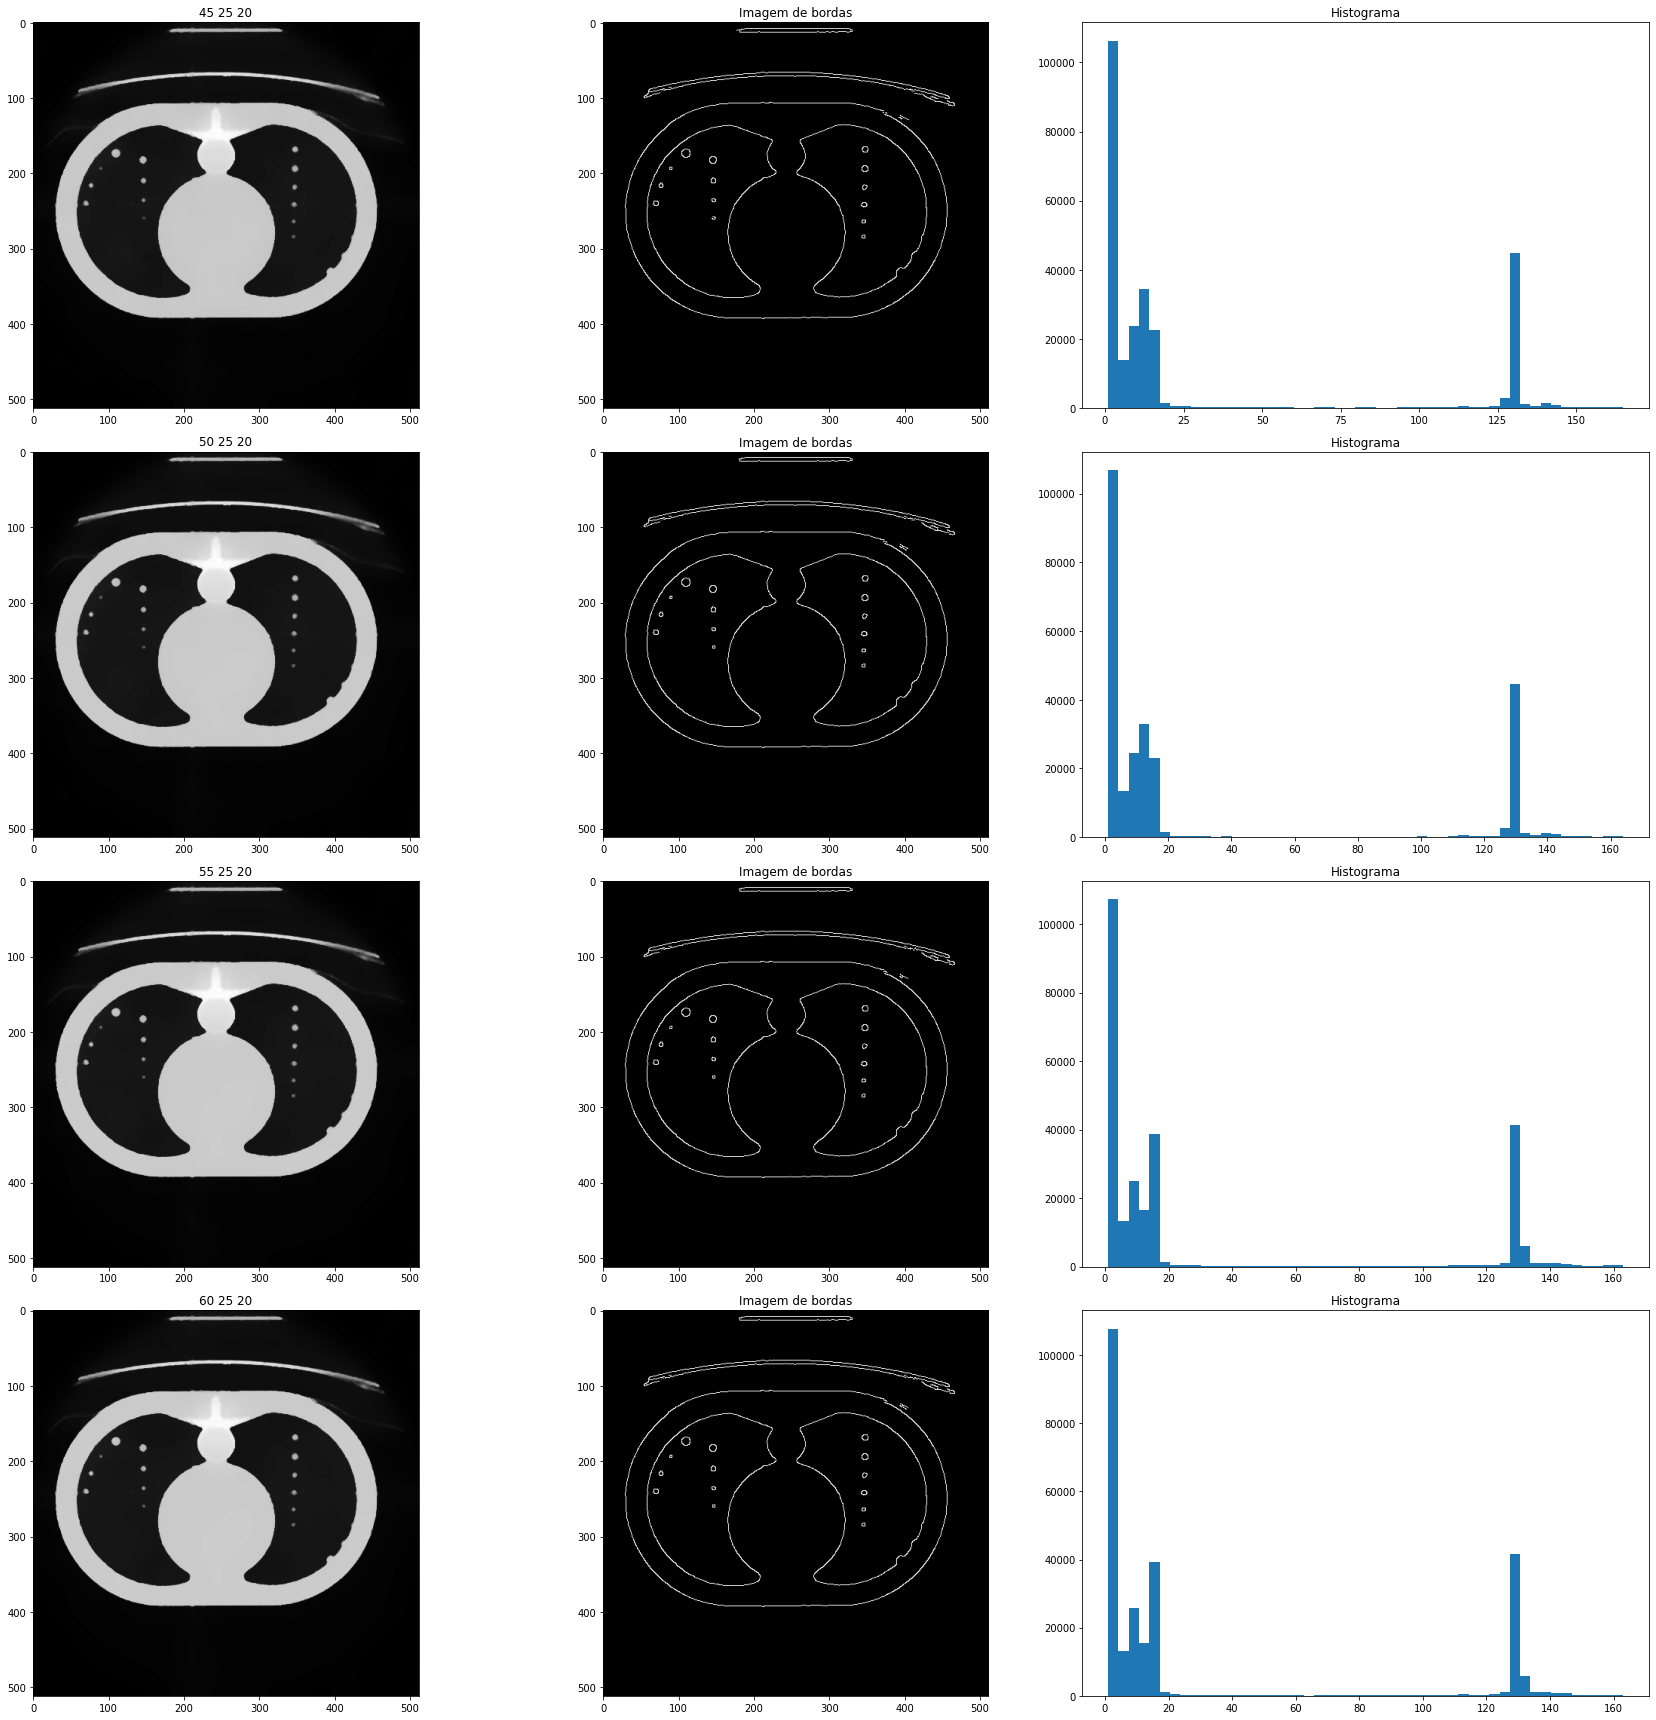

In [ ]:
# Buscando parâmetros ótimos para filtragem bilateral para a imagem img[0]

plt.figure(figsize=[24, 24])

img_bilateral = cv2.bilateralFilter(img_median[0], 45, 25, 20)
plt.subplot(4, 3, 1)
plt.imshow(img_bilateral, cmap='gray')
plt.title('45 25 20')

img_edges = cv2.Canny(img_bilateral, 50, 120)
plt.subplot(4, 3, 2)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 3)
_=plt.hist(img_bilateral.flatten(), 50)
plt.title('Histograma')

img_bilateral = cv2.bilateralFilter(img_median[0], 50, 25, 20)
plt.subplot(4, 3, 4)
plt.imshow(img_bilateral, cmap='gray')
plt.title('50 25 20')

img_edges = cv2.Canny(img_bilateral, 50, 120)
plt.subplot(4, 3, 5)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 6)
_=plt.hist(img_bilateral.flatten(), 50)
plt.title('Histograma')

img_bilateral = cv2.bilateralFilter(img_median[0], 55, 25, 20)
plt.subplot(4, 3, 7)
plt.imshow(img_bilateral, cmap='gray')
plt.title('55 25 20')

img_edges = cv2.Canny(img_bilateral, 50, 120)
plt.subplot(4, 3, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 9)
_=plt.hist(img_bilateral.flatten(), 50)
plt.title('Histograma')

img_bilateral = cv2.bilateralFilter(img_median[0], 60, 25, 20)
plt.subplot(4, 3, 10)
plt.imshow(img_bilateral, cmap='gray')
plt.title('60 25 20')

img_edges = cv2.Canny(img_bilateral, 50, 120)
plt.subplot(4, 3, 11)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

plt.subplot(4, 3, 12)
_=plt.hist(img_bilateral.flatten(), 50)
plt.title('Histograma')

plt.tight_layout()

Depois de várias simulações a melhor configuração parece ser 45, 25, 20.

In [ ]:
#filtragem bilateral

img_bilateral = []

for i in range(len(img_median)):
  image = cv2.bilateralFilter(img_median[i], 45, 25, 20)
  img_bilateral.append(image)

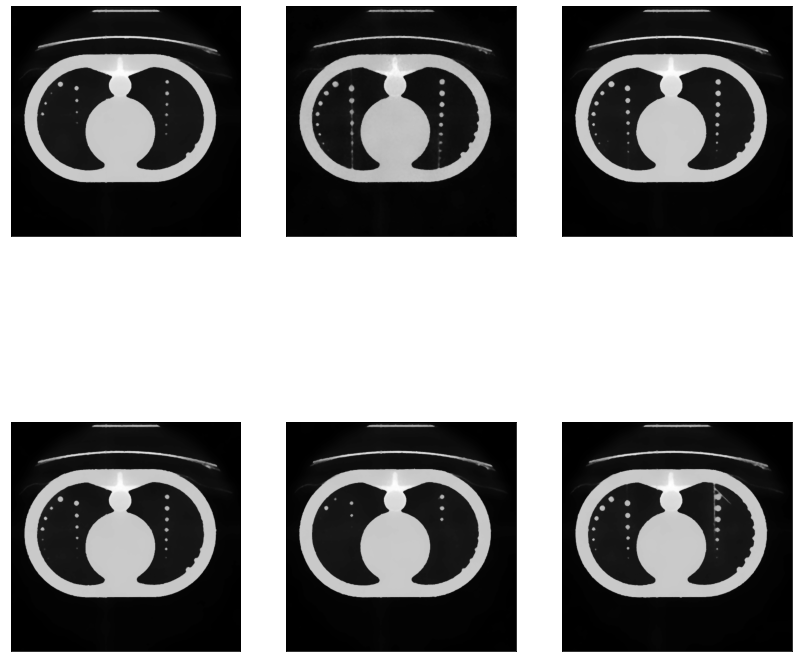

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(img_bilateral)):
    plt.subplot(2,3,i+1)
    plt.imshow(img_bilateral[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

#Limiarização

Visando melhor identificar os pequenos objetos (small objects), uma das estratégias foi isolar os nódulos. Para tanto, foi utilizada a técnica de limiarização, também conhecida como binarização. 

A técnica de limiarização utilizada foi a binarização de Otsu, que consiste em uma espécie de binarização automática, onde o cálculo do melhor limiar é feito pelo próprio algoritmo.

In [ ]:
thresholded_median = []

for i in range(len(img_median)):
  image = cv2.threshold(img_median[i], 1, 255,
                cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  thresholded_median.append(image)

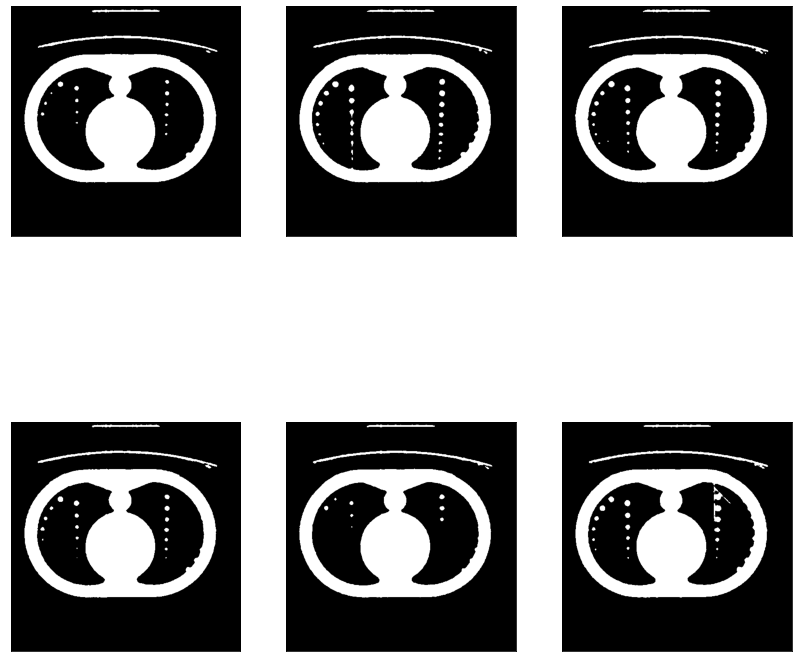

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(thresholded_median)):
    plt.subplot(2,3,i+1)
    plt.imshow(thresholded_median[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
thresholded_gauss = []

for i in range(len(img_gauss)):
  image = cv2.threshold(img_gauss[i], 1, 255,
                cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  thresholded_gauss.append(image)

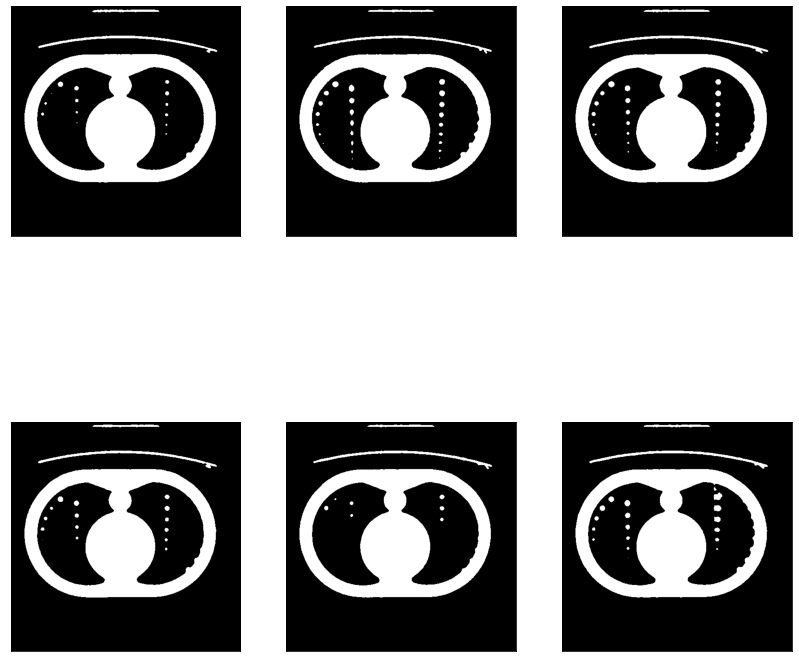

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(thresholded_gauss)):
    plt.subplot(2,3,i+1)
    plt.imshow(thresholded_gauss[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
thresholded_bilateral = []

for i in range(len(img_bilateral)):
  image = cv2.threshold(img_bilateral[i], 1, 255,
                cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  thresholded_bilateral.append(image)

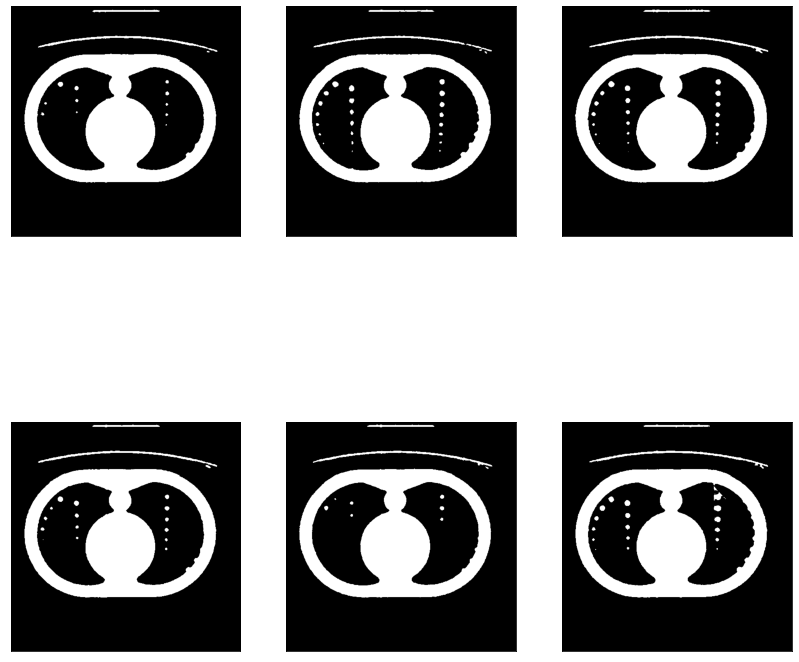

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(thresholded_bilateral)):
    plt.subplot(2,3,i+1)
    plt.imshow(thresholded_bilateral[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

#Preenchimento

Para selecionar as regiões menores das imagens, no caso os pequenos nódulos, foi necessário identificar os aglomerados de pixels associados a cada um deles. Com as imagens binárias, a partir do procedimento descrito anteriormente, cada pixel passou a assumir apenas dois valores - 0 ou 255 - indicando que o pixel pertence ao fundo da imagem ("0") ou a algum objeto nela presente ("255"). Considerando que cada aglomerado de pixels podia ser interpretado como um objeto individual, fez-se necessária uma estratégia para descobrir esses aglomerados de pixels. Para tanto, foi utilizado o  algoritmo floodfill.

No caso da região ser muito grande, cuja área estivesse fora dos limites de tamanho, esta era preenchida com zero, cor de fundo, para ser desconsiderada no processamento. Tal procedimento contribuiu consideravelmente para isolar os nódulos, pois foi feito o preenchimento da caixa torácica com a cor preta, de modo a destacar os nódulos brancos.

In [ ]:
minarea = 10  #área mínima dos nódulos
maxarea = 300 #área máxima dos nódulos

smallObjects_median = []

for x in range(len(thresholded_median)):
  small = copy.deepcopy(thresholded_median[x])
  for i, rows in enumerate(small):
    for j, value in enumerate(rows):
      if value == 255:
        # found an object
        p = (j, i)
        # fill object with some value e verify its area
        area = cv2.floodFill(small, None, p, 1)
        # if area (number of pixels) inside limits
        if area[0] > minarea and area[0] < maxarea:
          # refill with some value different from 255 (eg: 254)
          # it prevents from detects the same region again
          # on next loop
          cv2.floodFill(small, None, p, 254)
        else:
          # if region is too big, remove it from image.
          cv2.floodFill(small, None, p, 0);
  smallObjects_median.append(small)

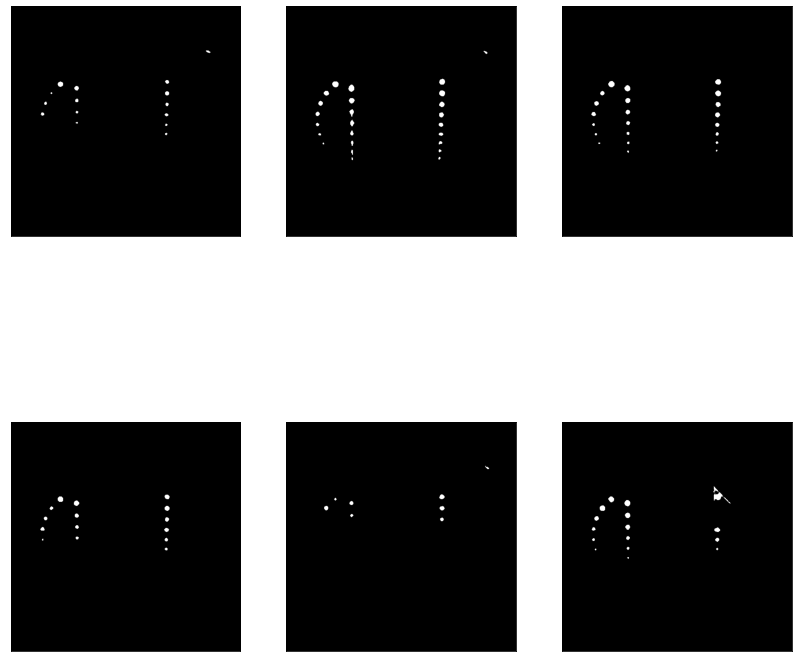

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(smallObjects_median)):
    plt.subplot(2,3,i+1)
    plt.imshow(smallObjects_median[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
minarea = 10  #área mínima dos nódulos
maxarea = 300 #área máxima dos nódulos

smallObjects_gauss = []

for x in range(len(thresholded_gauss)):
  small = copy.deepcopy(thresholded_gauss[x])
  for i, rows in enumerate(small):
    for j, value in enumerate(rows):
      if value == 255:
        # encontra um objeto
        p = (j, i)
        # preenche o objeto com algum valor e verifica sua área
        area = cv2.floodFill(small, None, p, 1)
        # se a área (número de pixels) estiver dentro dos limites
        if area[0] > minarea and area[0] < maxarea:
          # preencha com algum valor diferente de 255 (ex: 254)
          # isso impede de detectar a mesma região novamente
          # no próximo next loop
          cv2.floodFill(small, None, p, 254)
        else:
          # se a região for muito grande, remova-a da imagem.
          cv2.floodFill(small, None, p, 0);
  smallObjects_gauss.append(small)

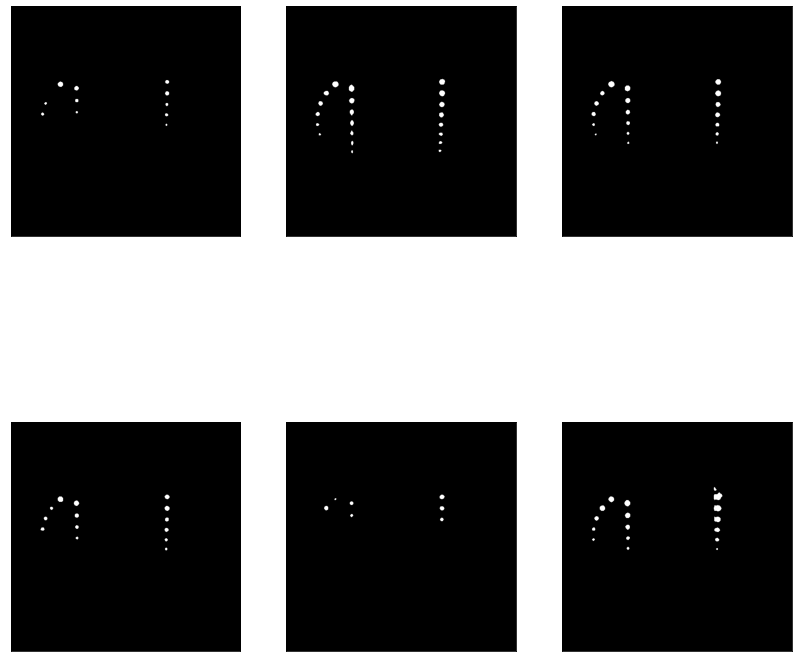

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(smallObjects_gauss)):
    plt.subplot(2,3,i+1)
    plt.imshow(smallObjects_gauss[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
minarea = 10  #área mínima dos nódulos
maxarea = 300 #área máxima dos nódulos

smallObjects_bilateral = []

for x in range(len(thresholded_bilateral)):
  small = copy.deepcopy(thresholded_bilateral[x])
  for i, rows in enumerate(small):
    for j, value in enumerate(rows):
      if value == 255:
        
        p = (j, i)
        
        area = cv2.floodFill(small, None, p, 1)
        
        if area[0] > minarea and area[0] < maxarea:
        
          cv2.floodFill(small, None, p, 254)
        else:
        
          cv2.floodFill(small, None, p, 0);
  smallObjects_bilateral.append(small)

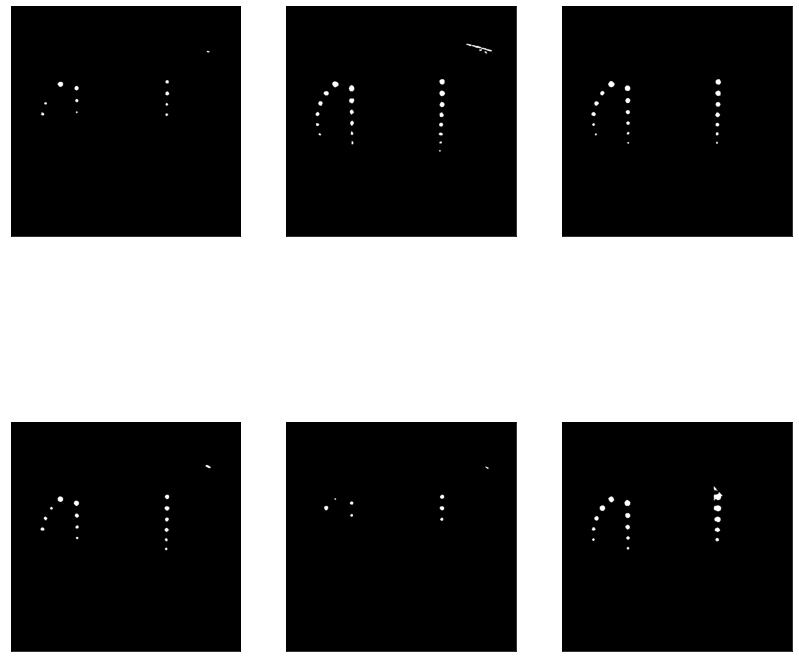

In [ ]:
plt.figure(figsize = (14,14))
for i in range(len(smallObjects_bilateral)):
    plt.subplot(2,3,i+1)
    plt.imshow(smallObjects_bilateral[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

# Detecção de nódulos

In [ ]:
path  = "/content/drive/MyDrive/PDI_Sylvia_Rodrigo_Jesus/"
img = []
img_path = {"image_path":[]}

for image in glob.glob(path+"/"+"*.jpg"):
    #x = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img.append(image)
    img_path["image_path"].append(image)

img_path = pd.DataFrame(img_path)


In [ ]:
img[1]

'/content/drive/MyDrive/PDI_Sylvia_Rodrigo_Jesus/Lung4.jpg'

Para a detecção de nódulos, foi utilizado:
https://drive.google.com/file/d/165cfSiIqKT_1nSz2Nn7k9FFwaGgnf2vC/view?usp=sharing

In [ ]:
# Função para imprimir círculos contidos na lista C na imagem img
#
def draw_circles(img, C, color=(255,0,0), thickness=2):
  circleCoordinates = np.argwhere(C)     
  res = np.zeros(img.shape, dtype=np.uint8)                                     #Extracting the circle information
  for r,x,y in circleCoordinates:
    res = cv2.circle( img, (y,x), r, color, thickness)
  return res

In [ ]:
# Transformada de Hough para a detecção de círculos
#
def hough_circulos(img_edges, threshold, region, radius = None):
    (M,N) = img_edges.shape

    if radius == None:
        R_max = np.max((M,N))
        R_min = 3
    else:
        [R_min,R_max] = radius

    R = R_max - R_min

    # Inicializa o acumulador de Hough.
    # O acumulador é um array tridimensional com as dimensões representando
    # o raio e as coordenadas (X e Y) do centro do círculo.  
    # Fazendo o padding de 2 vezes o valor de R_max evita problemas de círculos 
    # detectados próximos às bordas da imagem. 
    A = np.zeros((R_max,M+2*R_max,N+2*R_max))
    B = np.zeros((R_max,M+2*R_max,N+2*R_max))

    # Pré-calcula todos os ângulos para aumentar a velocidade de processamento
    theta = np.arange(0,360)*np.pi/180
    edges = np.argwhere(img_edges[:,:])                                               #Extrai todas as coordenadas das bordas

    for val in range(R):
        r = R_min+val

        # Cria um modelo (blueprint) de um círculo
        bprint = np.zeros((2*(r+1),2*(r+1)))
        (m,n) = (r+1,r+1)                                                       #Encontra o centro do filtro

        for angle in theta:
            x = int(np.round(r*np.cos(angle)))
            y = int(np.round(r*np.sin(angle)))
            bprint[m+x,n+y] = 1

        constant = np.argwhere(bprint).shape[0]

        for x,y in edges:                                                       #Para cada coordenada das bordas
            # Centraliza o modelo do círculo sobre as bordas
            # e atualiza o acumulador de Hough
            X = [x-m+R_max, x+m+R_max]                                          
            Y = [y-n+R_max, y+n+R_max]                                          
            A[r,X[0]:X[1],Y[0]:Y[1]] += bprint
        A[r][A[r]<threshold*constant/r] = 0

    for r,x,y in np.argwhere(A):
        temp = A[r-region:r+region,x-region:x+region,y-region:y+region]
        try:
            p,a,b = np.unravel_index(np.argmax(temp),temp.shape)
        except:
            continue
        B[r+(p-region),x+(a-region),y+(b-region)] = 1

    return B[:,R_max:-R_max,R_max:-R_max]

In [ ]:
img_edges = cv2.Canny(smallObjects_gauss[2], 50, 120)
#img_edges= img_edges > img_edges.mean()

In [ ]:
# nodulos
threshold = 2
region = 2
radius = [1,7]

In [ ]:
res = hough_circulos(img_edges, threshold, region, radius)

-1

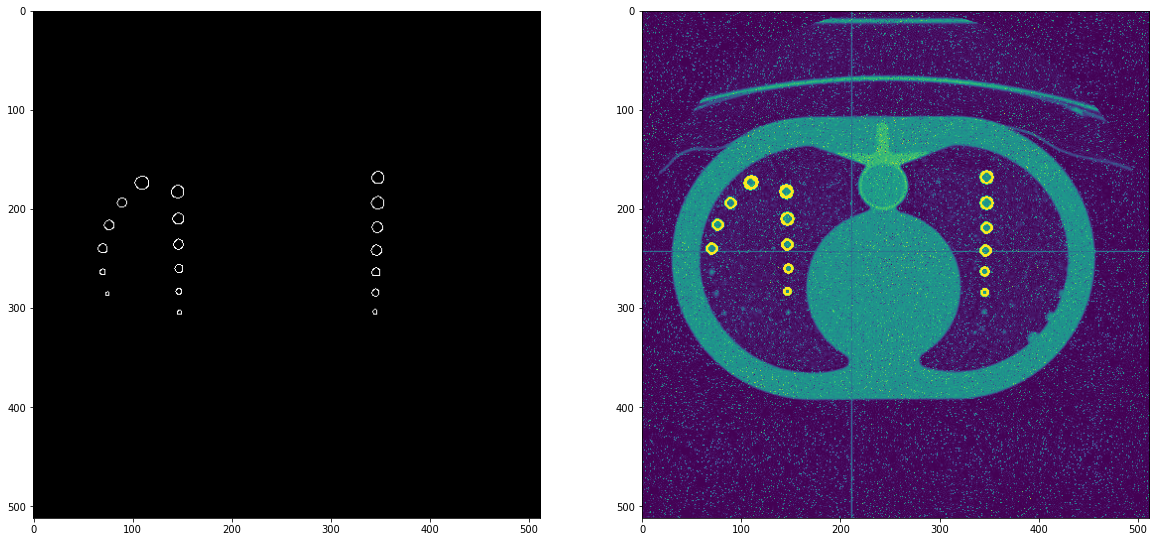

In [ ]:
imga = cv2.imread(img[3], cv2.IMREAD_GRAYSCALE)
img_draw = draw_circles(imga, res, color=(255,0,0), thickness=2)
plt.figure(figsize=[20,20])
plt.subplot(1,2,1)
plt.imshow(img_edges,'gray')
plt.subplot(1,2,2)
plt.imshow(img_draw)
cv2.destroyAllWindows()
cv2.waitKey(0)

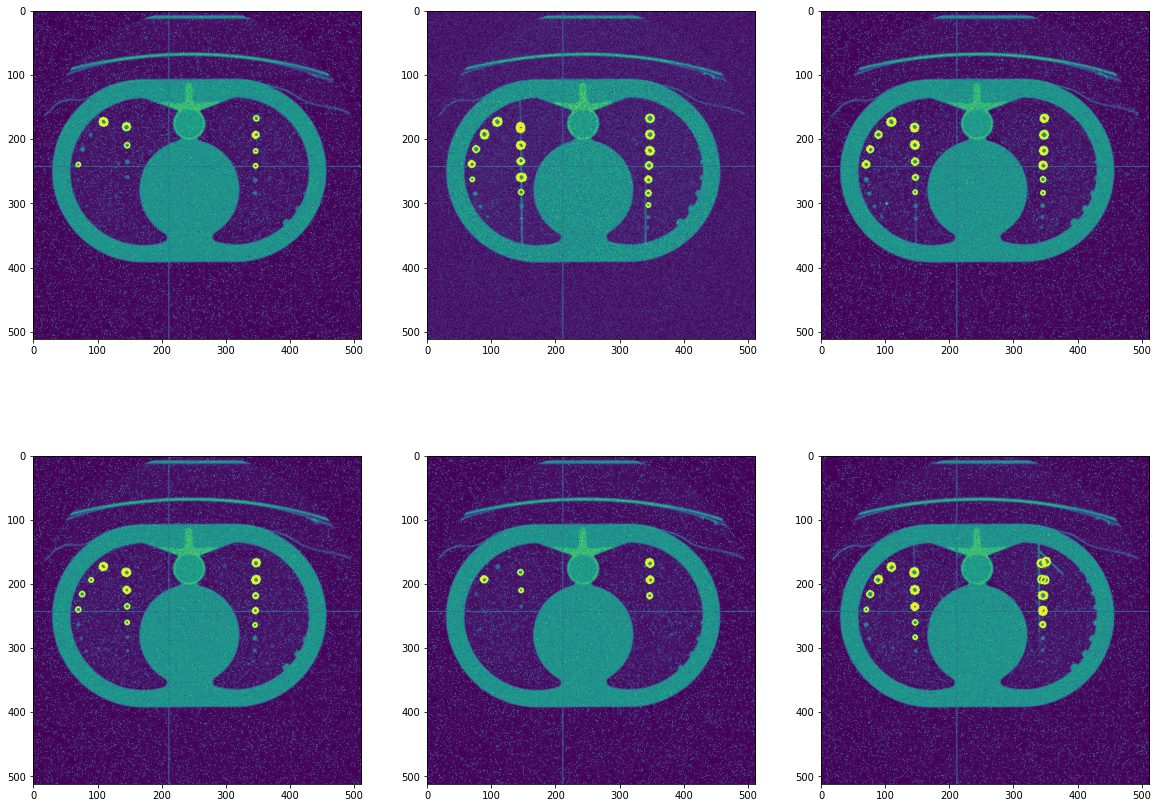

-1

In [ ]:
plt.figure(figsize = (20,15)) 
for i in range(len(img)):
  img_edges1 = smallObjects_gauss[i]
  img_edges1 = cv2.Canny(img_edges1, 80, 120)
  # nódulos
  threshold = 2
  region = 1
  radius = [1,7]
  res1 = hough_circulos(img_edges1, threshold, region, radius)
  img_color1 = cv2.imread(img[i], cv2.IMREAD_GRAYSCALE)
  img_draw1 = draw_circles(img_color1, res1, color=(255,0,0), thickness=2)
  plt.subplot(2,3,i+1)
  plt.imshow(img_draw1)
plt.show()
cv2.destroyAllWindows()
cv2.waitKey(0)

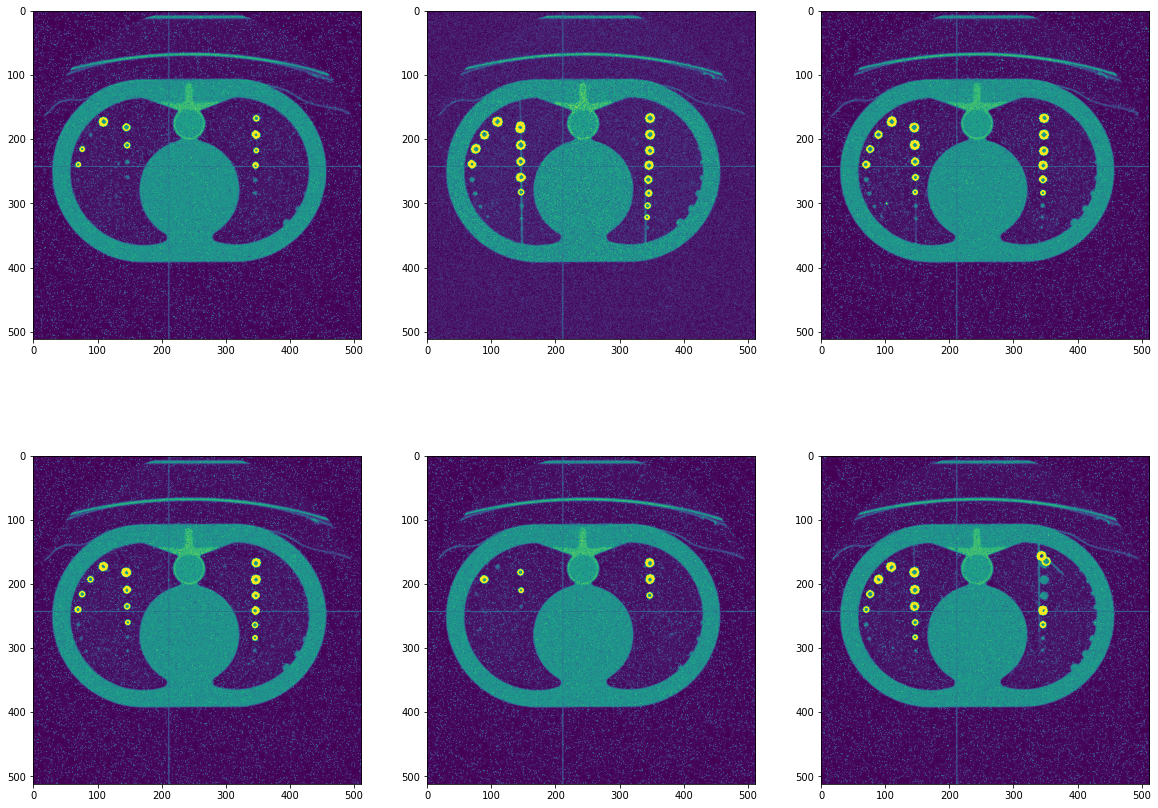

-1

In [ ]:
plt.figure(figsize = (20,15)) 
for i in range(len(img)):
  img_edges2 = smallObjects_median[i]
  img_edges2 = cv2.Canny(img_edges2, 50, 120)
  # nódulos
  threshold = 2
  region = 1
  radius = [1,7]
  res2 = hough_circulos(img_edges2, threshold, region, radius)
  img_color2 = cv2.imread(img[i], cv2.IMREAD_GRAYSCALE)
  img_draw2 = draw_circles(img_color2, res2, color=(255,0,0), thickness=2)
  plt.subplot(2,3,i+1)
  plt.imshow(img_draw2)
plt.show()
cv2.destroyAllWindows()
cv2.waitKey(0)

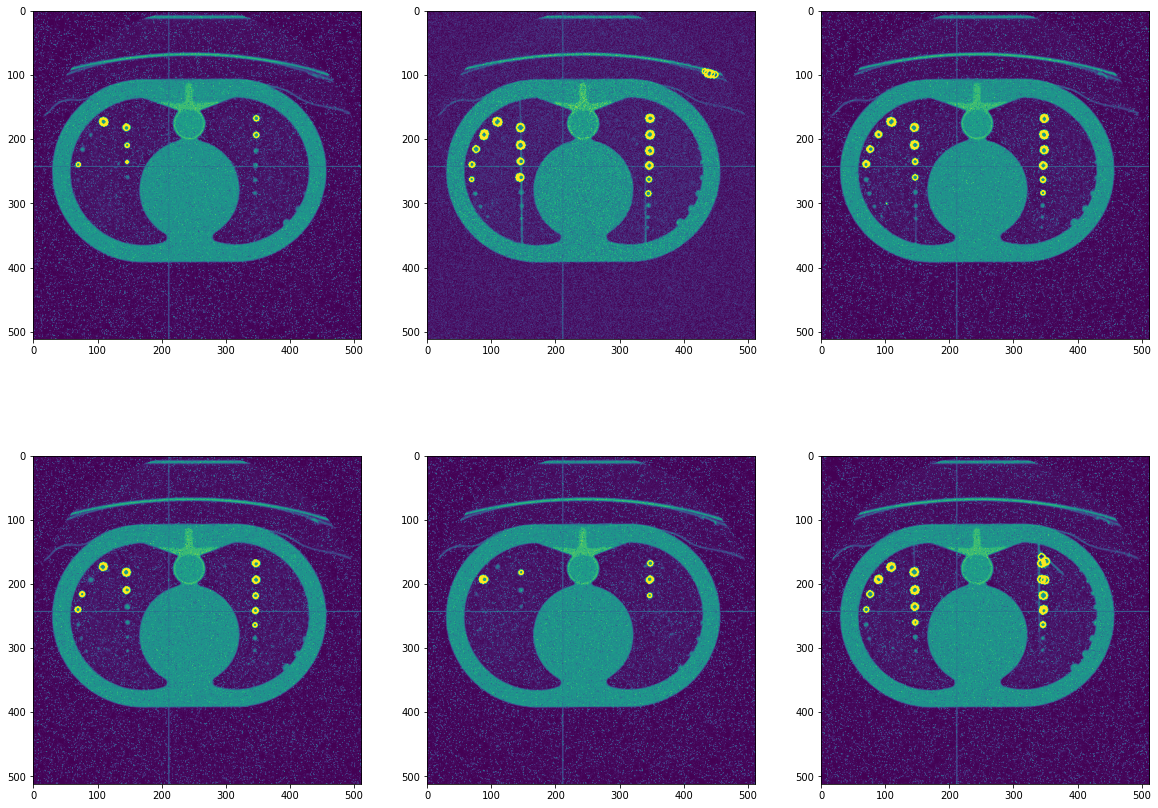

-1

In [ ]:
plt.figure(figsize = (20,15)) 
for i in range(len(img)):
  img_edges3 = smallObjects_bilateral[i]
  img_edges3 = cv2.Canny(img_edges3, 50, 120)
  # nodulos
  threshold = 2
  region = 1
  radius = [1,7]
  res3 = hough_circulos(img_edges3, threshold, region, radius)
  img_color3 = cv2.imread(img[i], cv2.IMREAD_GRAYSCALE)
  img_draw3 = draw_circles(img_color3, res3, color=(255,0,0), thickness=2)
  plt.subplot(2,3,i+1)
  plt.imshow(img_draw3)
plt.show()
cv2.destroyAllWindows()
cv2.waitKey(0)


Observacionalmente, foi determinado que o melhor detector de nódulos foi o smallObjects_median.

# **Medida de tamanho de nódulos** 

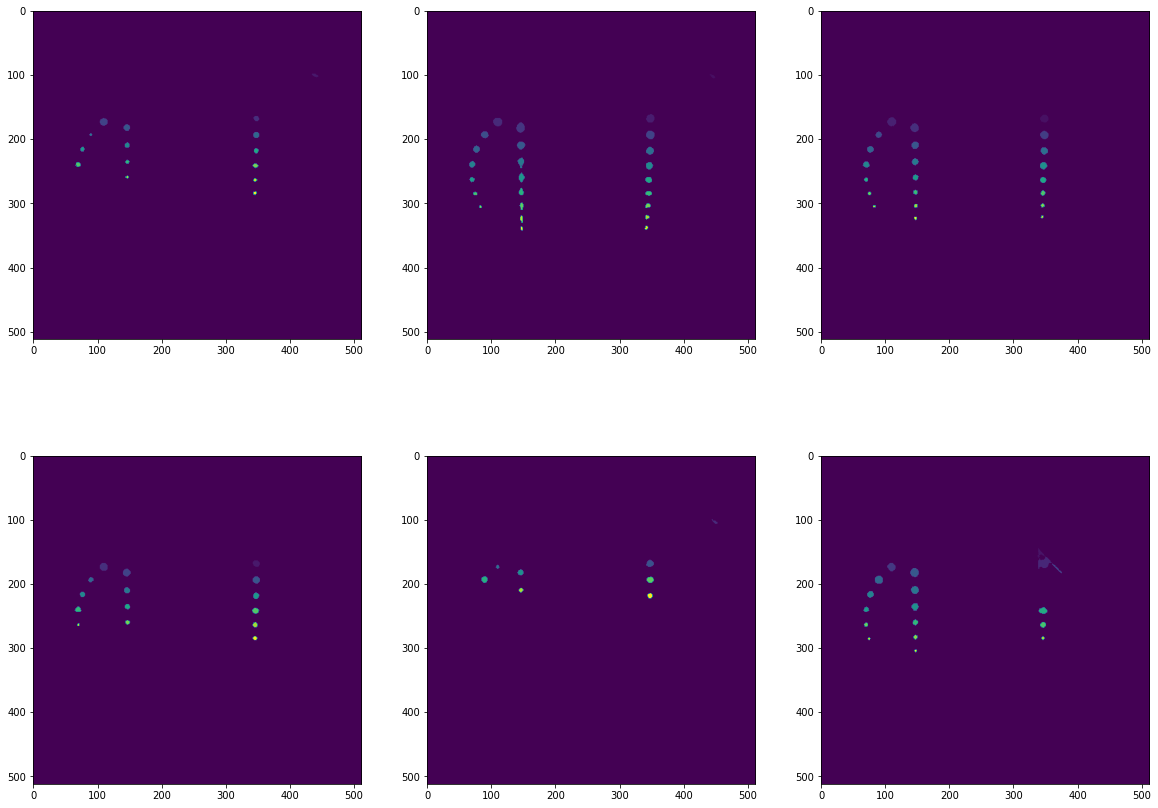

-1

In [ ]:
plt.figure(figsize = (20,15)) 
num_nodul=[]
sizes_nod = []
lung_name = []
for i in range(len(img)):
  label_im, nb_labels = ndimage.label(smallObjects_median[i])
  nom= str(img[i])
  lung_name.append(nom[-9:-4]) # type lung
  num_nodul.append(nb_labels)
  mask = label_im > label_im.mean()
  sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
  sizes_nod.append(sizes) 
  plt.subplot(2,3,i+1)
  plt.imshow(label_im)
plt.show()
cv2.destroyAllWindows()
cv2.waitKey(0)

In [ ]:
lung_name

['Lung1', 'Lung4', 'Lung3', 'Lung5', 'Lung6', 'Lung2']

In [ ]:
#Número de nódulos detectados
num_nodulos = pd.DataFrame(num_nodul).T
num_nodulos.columns= lung_name
num_nodulos

Lung1  Lung4  Lung3  Lung5  Lung6  Lung2
0     15     25     22     15      8     18

In [ ]:
#Pulmão e tamanho de nódulos detectados
nodulos = pd.DataFrame(sizes_nod).T
nodulos.columns= lung_name
nodulos

Lung1  Lung4  Lung3  Lung5  Lung6  Lung2
0     0.0    0.0    0.0    0.0    0.0    0.0
1    36.0   31.0  124.0   89.0   28.0   62.0
2    55.0  133.0  150.0  123.0   94.0  233.0
3   111.0  150.0  136.0  109.0   22.0  123.0
4    78.0  157.0  127.0   96.0   60.0   37.0
5    69.0  137.0   71.0   45.0   72.0  140.0
6    12.0   96.0  100.0   66.0   81.0  123.0
7    46.0  115.0   79.0   51.0   34.0  110.0
8    34.0   83.0   94.0   68.0   50.0   78.0
9    42.0  108.0   78.0   50.0    NaN   90.0
10   26.0   98.0   70.0   57.0    NaN   46.0
11   42.0   68.0   92.0   69.0    NaN   95.0
12   40.0   92.0   57.0   35.0    NaN   52.0
13   14.0   85.0   65.0   45.0    NaN   59.0
14   21.0   41.0   28.0   11.0    NaN   29.0
15   21.0   72.0   35.0   31.0    NaN   31.0
16    NaN   58.0   41.0    NaN    NaN   18.0
17    NaN   55.0   21.0    NaN    NaN   11.0
18    NaN   25.0   26.0    NaN    NaN   11.0
19    NaN   45.0   25.0    NaN    NaN    NaN
20    NaN   43.0   12.0    NaN    NaN    NaN
21    NaN   12.0   12.0    NaN    NaN    NaN
22    NaN   30.0   16.0    NaN    NaN    NaN
23    NaN   34.0    NaN    NaN    NaN    NaN
24    NaN   22.0    NaN    NaN    NaN    NaN
25    NaN   16.0    NaN    NaN    NaN    NaN

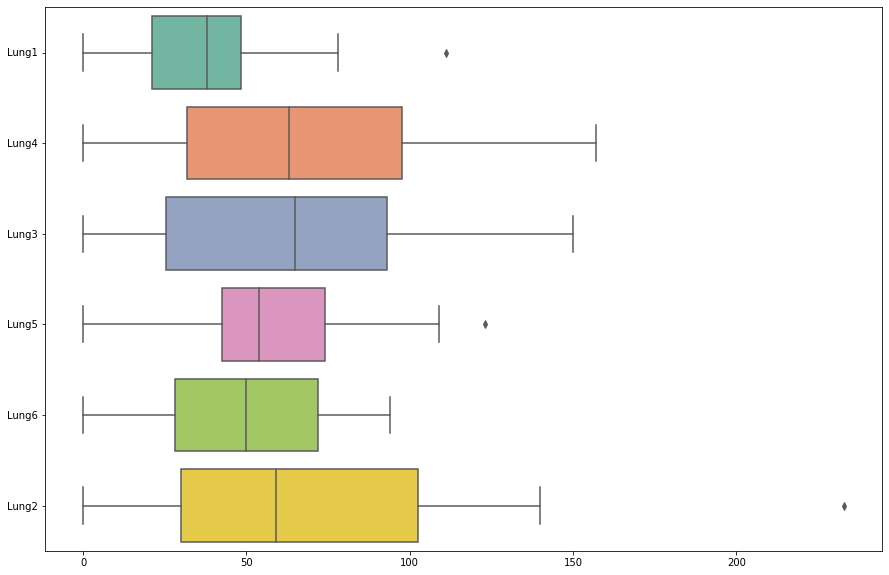

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=nodulos, orient="h", palette="Set2")